In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# dotenv.load_dotenv(override=True)

In [4]:
PROJECT_PATH_ROOT = os.getenv('PROJECT_PATH_ROOT')
SEED = int(os.getenv('SEED'))

In [5]:
PROJECT_PATH_ROOT

'F:\\shad\\projects\\pet\\rtk_mult_clf'

In [6]:
SEED

100500

In [7]:
DATA_PATH = os.path.join(PROJECT_PATH_ROOT, "data", "raw")

TRAIN_PATH = os.path.join(DATA_PATH, "train.xlsx")
TEST_PATH = os.path.join(DATA_PATH, "test.xlsx")

In [8]:
train = pd.read_excel(TRAIN_PATH)
test = pd.read_excel(TEST_PATH)

In [9]:
def show_info(df):
    print("#################")
    print("Samples: ", df.shape[0], "      ", "Features: ", df.shape[1])
    print("#################")
    print(df.info)
    print("#################")
    print(df.info())
    print("#################")
    print("Nan: ", df.isna().sum())
    print("Empty text: ", df[df.text == ""])
    display(df.sample(10, random_state=SEED))

In [10]:
show_info(train)

#################
Samples:  2442        Features:  2
#################
<bound method DataFrame.info of                                                    text  target
0      Здравствуйте, как поменять пароль на самом Wi-Fi       2
1                           У меня 2 день нет интернета       0
2               Можно узнать почему скачит пинг в игре?       6
3     Здравствуйте, стал плохо работать интернет роу...       4
4     Здравствуйте! Обрывы постоянные. Просмотр филь...       4
...                                                 ...     ...
2437              Здравствуйте, плохо работает интернет       4
2438            Добрый день!как поменять пароль вайфая!       2
2439  здравствуйте! у наших пожилых родителей устано...       5
2440  Здравствуйте, я не могу получить доступ к внут...       7
2441       Здравствуйте. Как поменять пароль от вайфая?       2

[2442 rows x 2 columns]>
#################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data column

,text,target
2441,Здравствуйте. Как поменять пароль от вайфая?,2
682,Добрый день. Я случайно повредил интернет кабе...,3
397,Добрый вечер. Почему нет интернета?,0
1513,Я в подьезде отключил в коробке кабель,3
1074,"Здраствуйте, второй день скорость интернета ме...",1
1427,Здравствуйте.Плохое интернет соединение.Роутер...,4
1149,Добрый день! У меня наблюдаются постоянные обр...,4
1785,Добрый вечер.. У меня с самого утра не работае...,0
1453,Добрый день. Мне нужна помощь. Суть проблемы: ...,4
1266,Я перезагружала роутер и не один раз. Не помог...,4


In [11]:
show_info(test)

#################
Samples:  250        Features:  2
#################
<bound method DataFrame.info of       id                                               text
0      0                    Как поставить пароль на вай-фай
1      1                  Почему низкая скорость интернета?
2      2  Здравствуйте. Это просто не выносимо, каждый д...
3      3  Здравствуйте.Целый день интернет глючит.В игра...
4      4  У нас не работает Ростелеком провод задели и ч...
..   ...                                                ...
245  245  Добрый день. Опять проблемы с домашним интерне...
246  246                           Модем сгорел после грозы
247  247  Что происходит? Интернет несколько дней ужасаю...
248  248  Добрый день! По предыдущей моей заявке мастер ...
249  249  Низкая скорость.телефон через вай фай даже пло...

[250 rows x 2 columns]>
#################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dt

,id,text
199,199,"Здравствуйте, почему не работает wi-fi"
244,244,Как изменить пароль от wifi
30,30,нет доступа нету выскакивает &quot;не удалось ...
160,160,Как подключить новый роутер к интернету?
42,42,У меня частный дом вайфай терминала не хватае...
36,36,Добрый день. Подскажите пожалуйста . Месяц наз...
89,89,"здравствуйте, у меня проблемы со скоростью инт..."
87,87,добрый день сгорел от молнии роутер.поставил д...
227,227,"Здравствуйте, у меня с уличной стороны повреди..."
218,218,"Здравствуйте,как мне войти в системные настрой..."


In [12]:
train.target.unique()

array([ 2,  0,  6,  4,  1,  5,  7,  8,  3,  9, 10], dtype=int64)

In [13]:
train.target.value_counts().reset_index()

,index,target
0,0,432
1,1,341
2,4,318
3,2,271
4,3,265
5,6,235
6,5,229
7,7,210
8,8,78
9,9,37


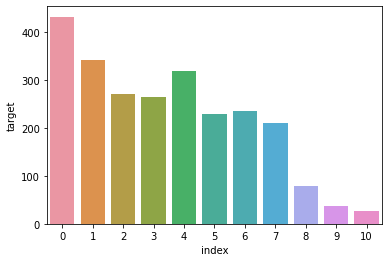

In [14]:
ax = sns.barplot(x="index", y="target", data=train.target.value_counts().reset_index())

* У нас есть 11 уникальных классов
* Классы 8, 9, 10 - представлены значительно меньшим числом элементов, чем другие классы